In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\aksha\AppData\Local\Temp\ipykernel_8408\2886774612.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Concrete Compressive Strength.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
for i in df.columns:
    print(i)
    print('Minimum',df[i].min())
    print('Maximum',df[i].max())
    print()

Cement (component 1)(kg in a m^3 mixture)
Minimum 102.0
Maximum 540.0
_______________________________________
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Minimum 0.0
Maximum 359.4
_______________________________________
Fly Ash (component 3)(kg in a m^3 mixture)
Minimum 0.0
Maximum 200.1
_______________________________________
Water  (component 4)(kg in a m^3 mixture)
Minimum 121.75
Maximum 247.0
_______________________________________
Superplasticizer (component 5)(kg in a m^3 mixture)
Minimum 0.0
Maximum 32.2
_______________________________________
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Minimum 801.0
Maximum 1145.0
_______________________________________
Fine Aggregate (component 7)(kg in a m^3 mixture)
Minimum 594.0
Maximum 992.6
_______________________________________
Age (day)
Minimum 1
Maximum 365
_______________________________________
Concrete compressive strength(MPa, megapascals) 
Minimum 2.331807832
Maximum 82.5992248
_________________________________

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

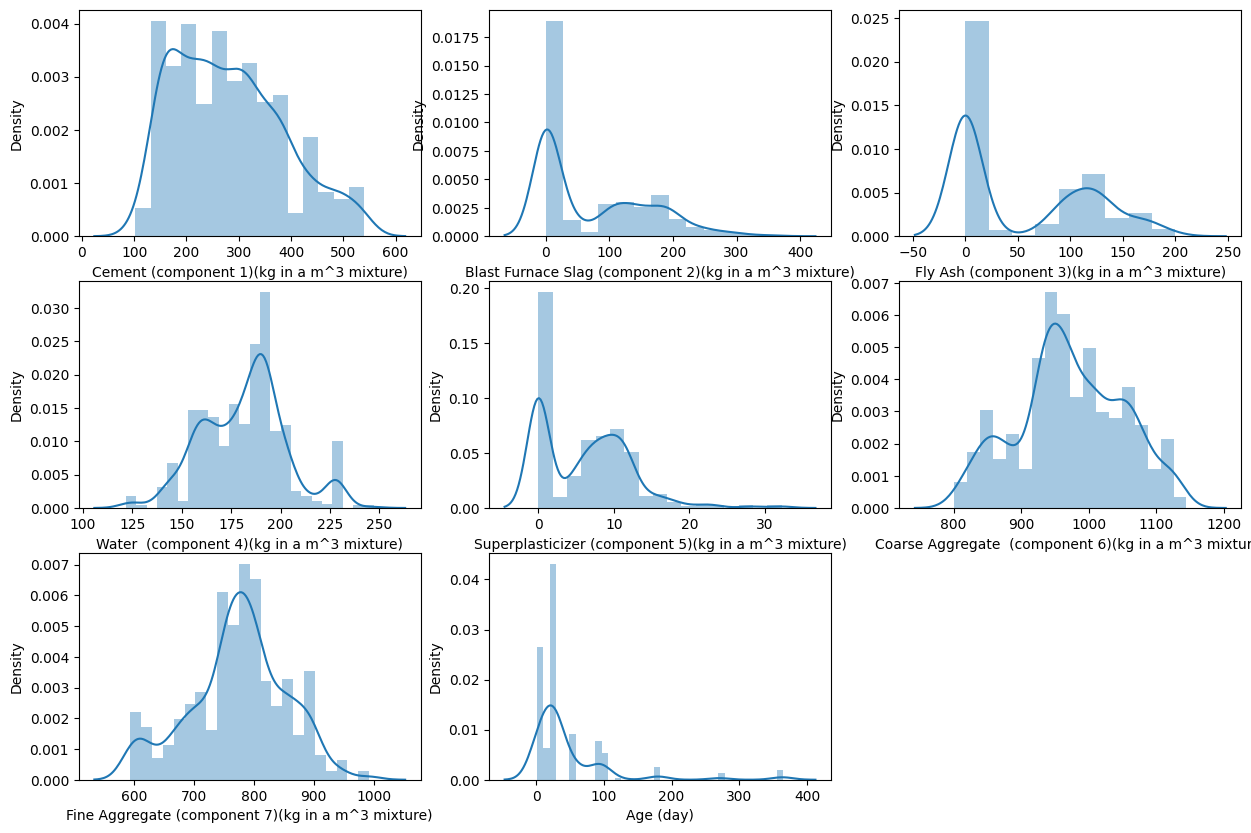

In [8]:
plt.figure(figsize=(15,10))
plot_num = 1
for col in  df.columns:
    if plot_num < 9:
        plt.subplot(3,3,plot_num)
        sns.distplot(df[col],kde=True)
    plot_num += 1

plt.tight_layout
plt.show()

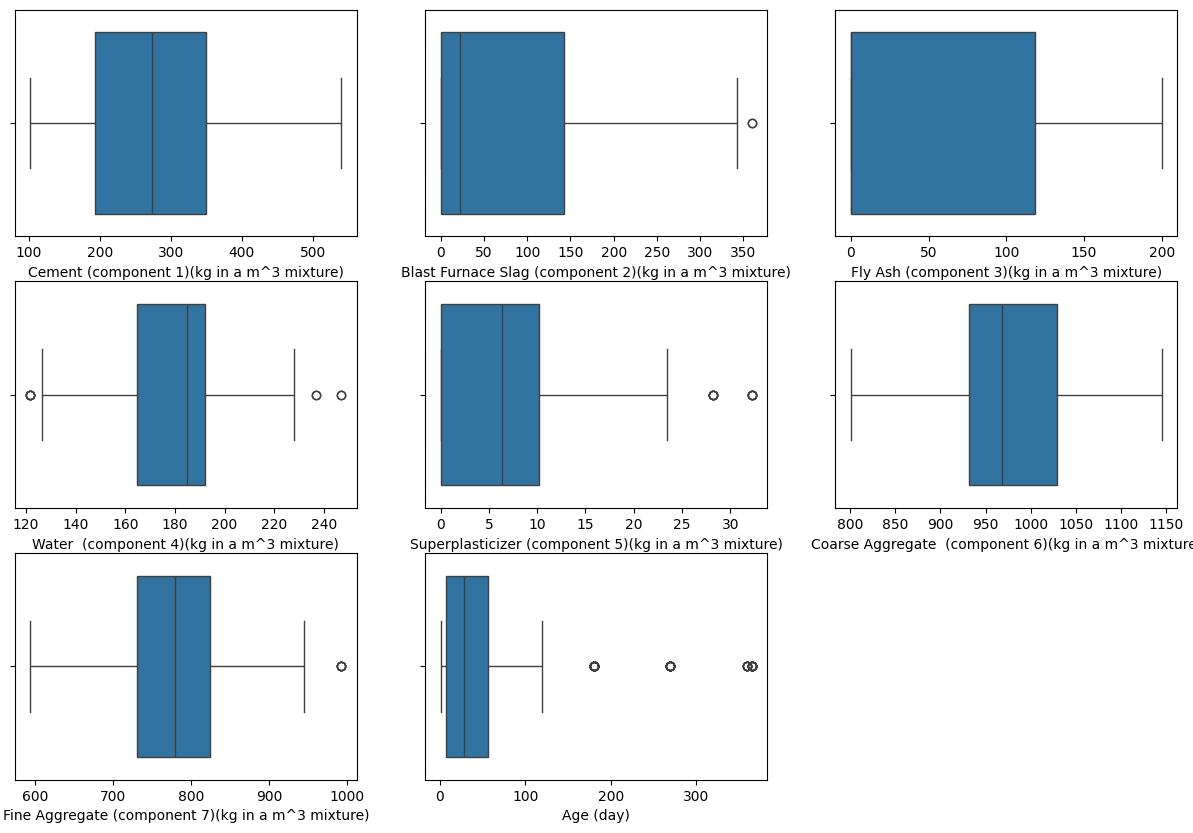

In [9]:
plt.figure(figsize=(15,10))
plot_num = 1
for col in  df.columns:
    if plot_num < 9:
        plt.subplot(3,3,plot_num)
        sns.boxplot(data=df,x=df[col])
    plot_num += 1

plt.tight_layout
plt.show()

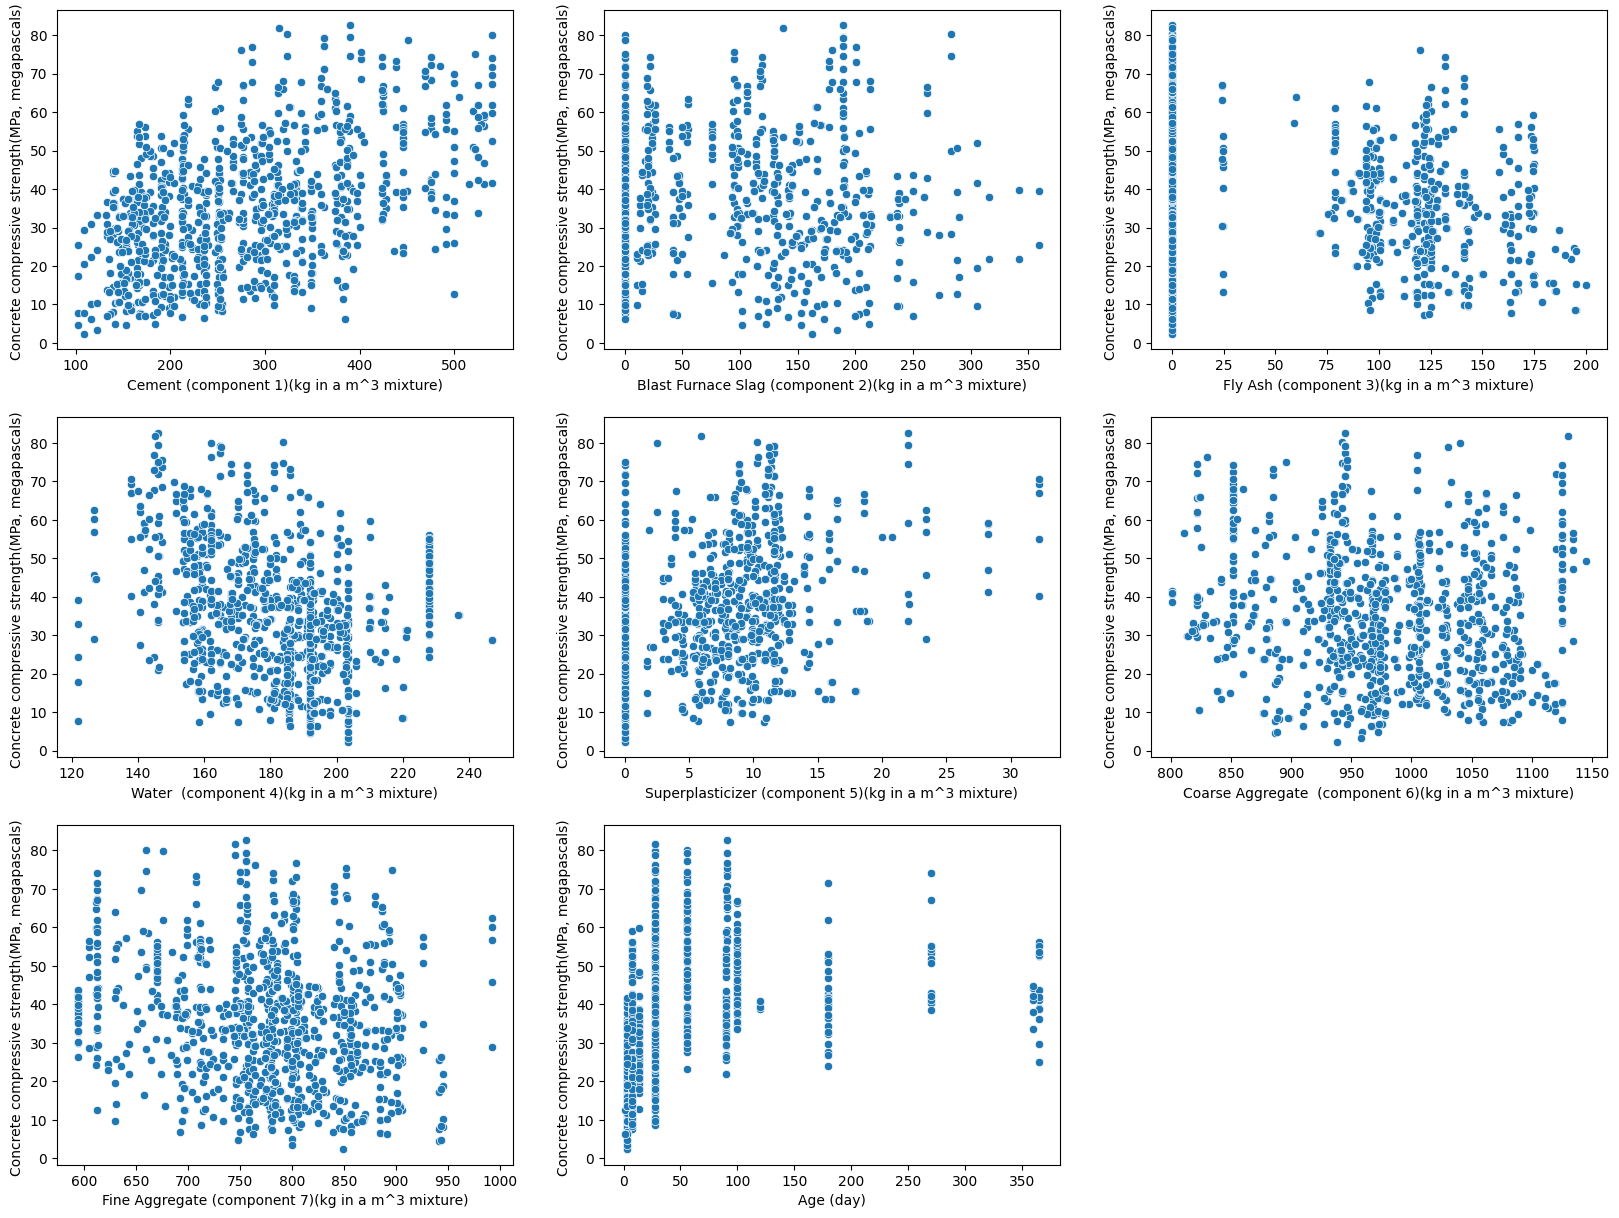

In [10]:
plt.figure(figsize=(20,15))
plot_num = 1
for col in  df.columns:
    if plot_num < 9:
        plt.subplot(3,3,plot_num)
        sns.scatterplot(data=df,x=df[col],y=df['Concrete compressive strength(MPa, megapascals) '])
    plot_num += 1

plt.tight_layout
plt.show()

<Axes: >

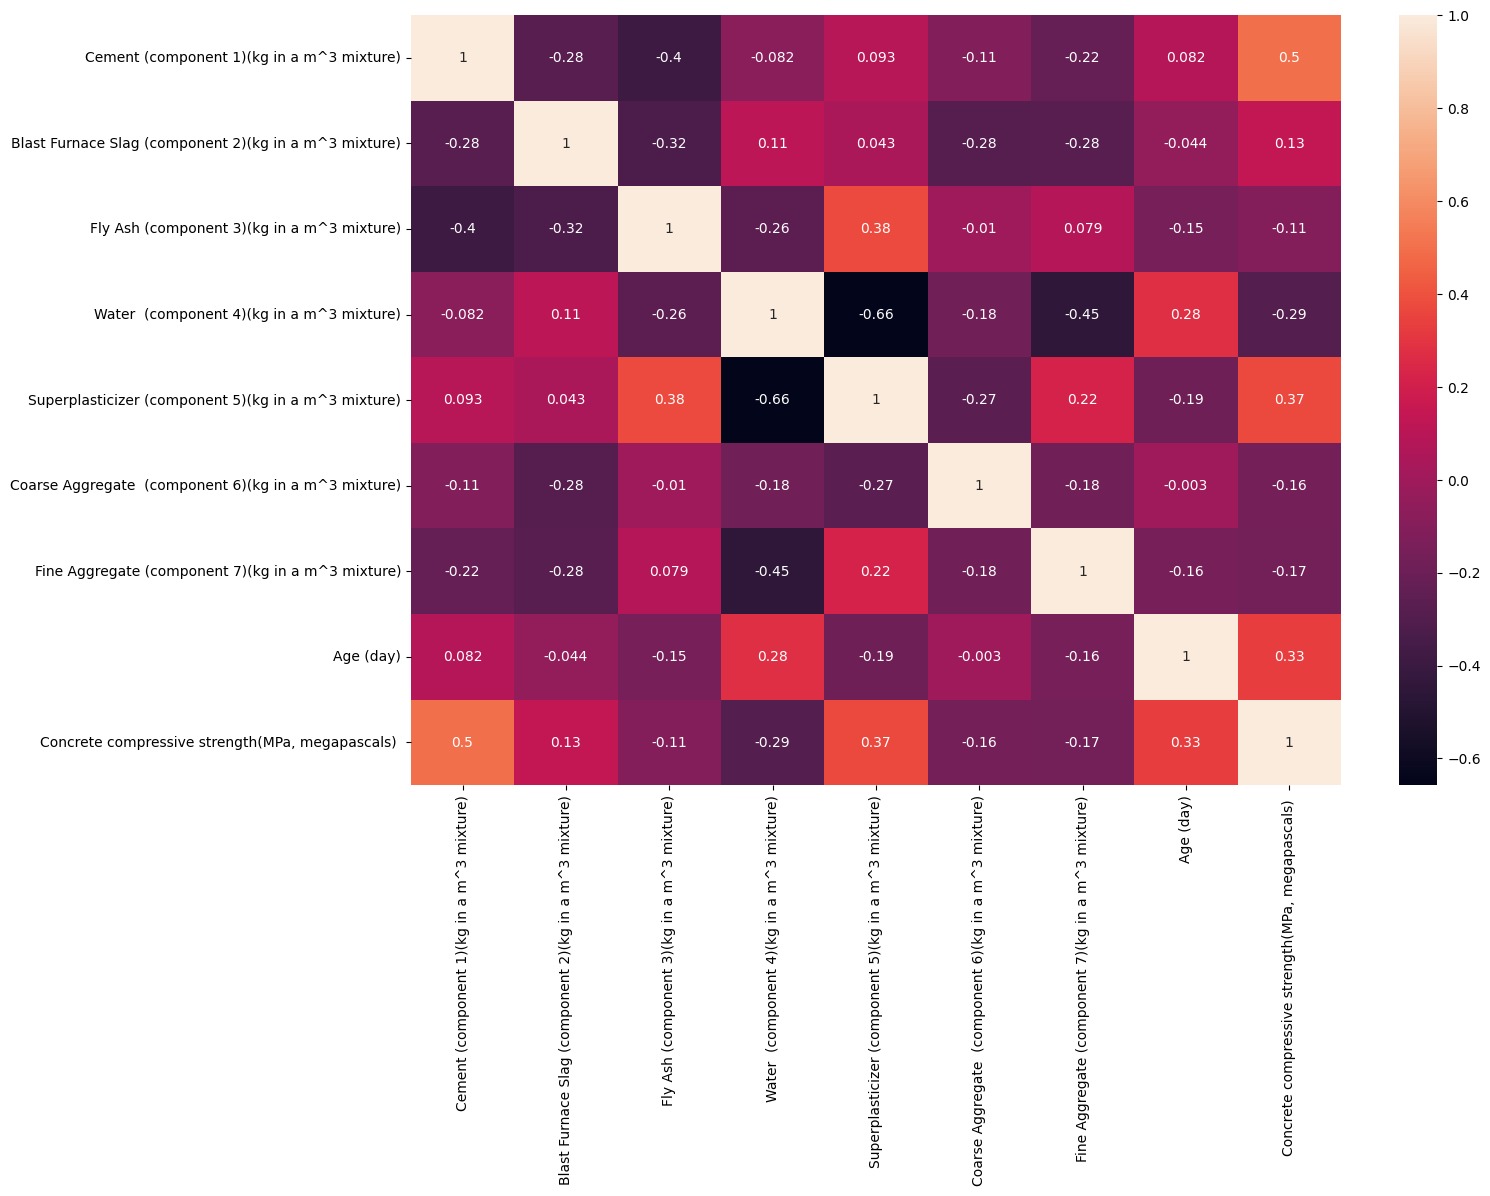

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True)

In [3]:
X = df.iloc[:,:-1] # Independent Feature
y = df.iloc[:,-1] #Dependent Feature
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1030, 8)
y shape (1030,)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (772, 8)
X_test shape (258, 8)
y_train shape (772,)
y_test shape (258,)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [15]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print('mean absolute error',mae)
print('R squred',score)


mean absolute error 8.61369101043681
R squred 0.594635419355264


## Lasso Regression

In [16]:
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('R squred',score)


mean absolute error 8.894118967590323
R squred 0.5827172759684579


## Ridge Regression

In [17]:
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
y_pred = ridge_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('R squred',score)

mean absolute error 8.622648958068073
R squred 0.5948484217416585


## Elastic Regression

In [18]:
elastic_reg = ElasticNet()
elastic_reg.fit(X_train,y_train)
y_pred = ridge_reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',mae)
print('R squred',score)

mean absolute error 8.622648958068073
R squred 0.5948484217416585


## Decision Tree

In [19]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)
y_pred = tree_regressor.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.8358949793444861


In [20]:
#Hyperparameter tuning
parameter = {'criterion':['squared_error', 'friedman_mse', 'absolute_error','poisson'],
            'splitter':['best', 'random'],
            'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
            'max_features':['auto', 'sqrt', 'log2']}
clf_tree_regressor = DecisionTreeRegressor()

In [21]:
clf_tree =GridSearchCV(clf_tree_regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')
clf_tree.fit(X_train,y_train)
print('beat param',clf_tree.best_params_)

beat param {'criterion': 'squared_error', 'max_depth': 11, 'max_features': 'log2', 'splitter': 'best'}


In [22]:
tree_model = DecisionTreeRegressor(criterion='absolute_error',max_depth=10,max_features='log2',splitter='best')
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.7844326684314649


## Support Vector Machine

In [23]:
parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf','polynomial']
}

In [24]:
svr_grid = GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,scoring='accuracy')
svr_grid.fit(X_train,y_train)
print(svr_grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [25]:
svr_model = SVR(C=0.1,gamma=1,kernel='linear')
svr_model.fit(X_train,y_train)
y_pred = svr_model.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.5898274391702134


## Random Forest Regression

In [26]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.9166123876054733


In [27]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [28]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [29]:
rfr_clf = RandomForestRegressor(max_depth=20,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=150)
rfr_clf.fit(X_train,y_train)
y_pred = rfr_clf.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.9250062485967978


## Ada Boost

In [30]:
grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(AdaBoostRegressor(), grid_params, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 80}

In [31]:
ada = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=100)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.8106281677491773


## Gradiant Boost Regressor

In [32]:
grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(GradientBoostingRegressor(), grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 200}

In [33]:
gbr = GradientBoostingRegressor(learning_rate=0.1,loss='huber',n_estimators=200)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
score = r2_score(y_test,y_pred)
print('R2 Score',score)

R2 Score 0.9282572911808106


In [34]:
models = pd.DataFrame({
    'Model':['Linear regression','Lasso regression','Ridge regression','Elastic Net','Decision Tree','Support Vector Machine','Random Forest','Ada Boost','Gradient Boost'],
    'R2 Score':[0.594635419355264,0.5827172759684579,0.5948484217416585,0.5948484217416585,0.8356443714964598,0.5898274391702134,0.9284135468044938,0.8117702264063423,0.9277156170831605]
})

In [35]:
models

,Model,R2 Score
0,Linear regression,0.594635
1,Lasso regression,0.582717
2,Ridge regression,0.594848
3,Elastic Net,0.594848
4,Decision Tree,0.835644
5,Support Vector Machine,0.589827
6,Random Forest,0.928414
7,Ada Boost,0.811770
8,Gradient Boost,0.927716


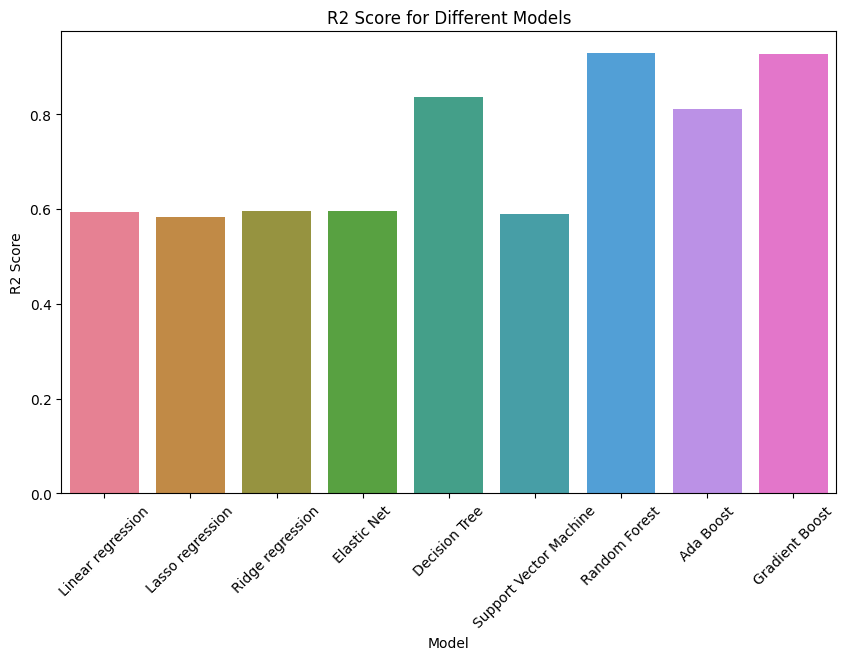

In [36]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("husl", len(models))
sns.barplot(data=models, x='Model', y='R2 Score', palette=colors)
plt.xticks(rotation=45)
plt.title('R2 Score for Different Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()


 Random Forest tends to be more robust to overfitting and noise, and it often performs well across a variety of datasets. Therefore, based solely on the R2 score, the Random Forest model might be preferred for prediction.

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = r2_score(y_test, y_pred)
    return mae, rmse, score

In [9]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Ada Boost': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
    
}

model_list= []
r2_list = []

for key,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    model_list.append(key)

    mae,rmse,score = evaluate_model(y_test,y_pred)
    r2_list.append(score)
    print('Model Training Performance')
    print('Model',key)
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",score*100)
    print('='*35)
    print('\n')

Model Training Performance
Model LinearRegression
RMSE: 10.685880440569642
MAE: 8.61369101043681
R2 score 59.4635419355264


Model Training Performance
Model Lasso
RMSE: 10.841830510966396
MAE: 8.894118967590323
R2 score 58.27172759684579


Model Training Performance
Model Ridge
RMSE: 10.68307257670658
MAE: 8.622648958068073
R2 score 59.484842174165856


Model Training Performance
Model Elasticnet
RMSE: 11.633424478427711
MAE: 9.437221423810707
R2 score 51.955870705787135


Model Training Performance
Model Decision Tree
RMSE: 6.696380140697391
MAE: 4.518845174294487
R2 score 84.08138142122213


Model Training Performance
Model Support Vector Machine
RMSE: 9.924959690326716
MAE: 8.038657679380185
R2 score 65.0310428812287


Model Training Performance
Model Random Forest
RMSE: 4.71980752702095
MAE: 3.3517876411372995
R2 score 92.09187082916011


Model Training Performance
Model Ada Boost
RMSE: 7.704014121316374
MAE: 6.388567061306397
R2 score 78.93025314756687


Model Training Performanc

In [37]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

with open('prediction.pkl','wb') as p:
    pickle.dump(rfr_clf,p)